# Import

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from scipy.cluster.hierarchy import linkage, fcluster
from py_func.clustering import get_matrix_similarity_from_grads
from copy import deepcopy
import py_func.personal_func as pf

# 问题
---
## 调整学习率和衰减系数
## 模型融合权重及方案
## 更换AlexNet
## × Adam优化器不适用
## × 分段衰减不适用

In [ ]:
# todo
# model 一开始就放入cuda，解决带来的bug
# 优化器改为adam
# lr优化器使用torch.optim.lr_scheduler.CosineAnnealingLR

optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, n_SGD, eta_min=0, last_epoch=-1)

optimizer.step()
print("第%d个epoch的学习率：%f" % (epoch,optimizer.param_groups[0]['lr']))
scheduler.step()

# Plot

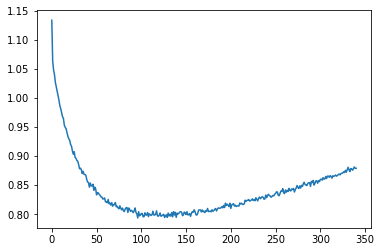

341


In [8]:
path = './saved_exp_info/'
name = 'server_acc'
name1 = 'server_loss'

# filename = '/CIFAR10_nbal_0.001_clustered_2_cosine_i1500_N50_lr0.05_B50_d1.0_p1.0_m5_0.pkl'
# filename = '/g_CIFAR10_nbal_0.001_i1500_n50_pre200_lr0.05_B50_d1.0_m5_s0.pkl'
# filename = '/g_CIFAR10_nbal_0.001_i1500_n50_pre200_lr0.1_B50_d0.99_m5_s0pkl'
# filename = '/g_CIFAR10_nbal_0.001_i1500_n50_pre100_lr0.01_B50_d0.996_m5_s0.pkl'
# filename = '/g_CIFAR10_nbal_0.001_i1500_n50_pre5_lr0.001_B50_d0.9_m5_s0.pkl'

# filename = '/p_n20_lr0.04_d0.30000000000000004_pre400.pkl'

# filename = '/p_n40_lr0.005_d1.0_pre400.pkl'

filename = '/p_n20_lr0.06_d0.993_pre400.pkl'


#python mPFL.py CIFAR10_nbal_0.001 clustered_2 cosine 0 20 0.02 0.2 1 True 400 10

inf = np.array(pickle.load(open(path + name1 + filename, 'rb')), dtype=object)
plt.plot(inf[:])
plt.show()

print(len(inf))
# picname = 'lr0.05_d1.0_p_'
# plt.savefig(f"./pic/{picname}{name}.jpg")

# plt.cla()

# inf = np.array(pickle.load(open(path + name1 + filename, 'rb')), dtype=object)
# plt.plot(inf[:])
# plt.savefig(f"./pic/{picname}{name1}.jpg")

# 实时曲线

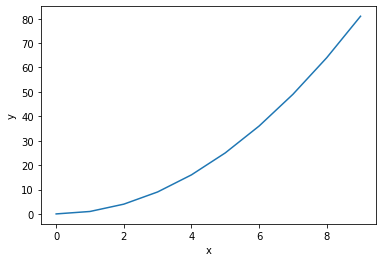

In [3]:
import torch
import matplotlib.pyplot as plt
from IPython import display
x_list = []
y_list = []
for i in range(10):
    x_list.append(i)
    y_list.append(i**2)
    display.clear_output(wait=True)
    plt.plot(x_list, y_list)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    plt.pause(0.1)

In [4]:
# inf = np.array(pickle.load(open(path + name + filename, 'rb')), dtype=object)
# while 990-len(inf)>0:
#     inf = np.array(pickle.load(open(path + name + filename, 'rb')), dtype=object)
#     display.clear_output(wait=True)
#     plt.plot(inf[:])
#     plt.show()
#     print(len(inf))
#     plt.pause(11)

# model

In [20]:
import torch
from torch.utils.data import Dataset, DataLoader
import pickle
import numpy as np

import torchvision.datasets as datasets
import torchvision.transforms as transforms

import os

batch_size = 50
shuffle = True

n_clients = 100
samples_train, samples_test = 500, 100

CIFAR10_train = datasets.CIFAR100(
    root="./data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)
print(np.where(np.array(CIFAR10_train.targets) == -1)[0])

Files already downloaded and verified
[]


In [108]:
dataset = pickle.load(open("./data/CIFAR10_nbal_0.001_train_100.pkl", "rb"))

In [112]:
print(len(dataset[0][0][0]))

32


In [117]:
n_classes = 100         # 类别?
n_clients = 100         # client个数
balanced = True         # 数据分布是否均衡
alpha = 0.0001
folder = "./data/"

file_name_train = f"CIFAR100_train_100.pkl"
path_train = folder + file_name_train

matrix = dirichlet([alpha] * n_classes, size=n_clients)

CIFAR100_train = datasets.CIFAR100(
    root="./data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)
dataset = CIFAR100_train

Files already downloaded and verified


In [116]:


print(n_samples)

[500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]


In [122]:
list_clients_X = [[] for i in range(n_clients)]
list_clients_y = [[] for i in range(n_clients)]
n_samples = [500] * n_clients

list_idx = []
for k in range(n_classes):
    idx_k = np.where(np.array(dataset.targets) == k)[0]
    list_idx += [idx_k]             # 第一维：标签值 第二维：属于该标签的条目下标
for idx_client, n_sample in enumerate(n_samples):

    clients_idx_i = []  # client_i 分到的数据条目下标
    client_samples = 0

    for k in range(n_classes):

        samples_digit = int(matrix[idx_client, k] * n_sample)

        clients_idx_i = np.concatenate(
            (clients_idx_i, np.random.choice(list_idx[k], samples_digit))   # 将标签k的数据随机选取分给client_i
        )

    clients_idx_i = clients_idx_i.astype(int)

    for idx_sample in clients_idx_i:

        list_clients_X[idx_client] += [dataset.data[idx_sample]]
        list_clients_y[idx_client] += [dataset.targets[idx_sample]]

    list_clients_X[idx_client] = np.array(list_clients_X[idx_client])

folder = "./data/"
with open(folder + file_name, "wb") as output:
    pickle.dump((list_clients_X, list_clients_y), output)

# list_dls_train = clients_set_CIFAR(
#     path_train, n_clients, batch_size, True
# )

In [19]:
import numpy as np
from numpy.random import dirichlet

alpha = 0.001
n_classes = 10

matrix = np.concatenate((dirichlet([alpha*100] * n_classes, size=30),dirichlet([alpha] * n_classes, size=70)))

print(matrix.shape)

(100, 10)


In [10]:
import os
import pickle

def save_pkl(dictionnary, directory, file_name):
    # 检查目录是否存在，如果不存在则创建目录
    if not os.path.exists(directory):
        print("创建目录!")
        os.makedirs(directory)
    # 拼接文件路径
    file_path = os.path.join(directory, f"{file_name}.pkl")
    print(file_path)
    # 使用 pickle.dump() 将字典对象存储到文件中
#     with open(file_path, "wb") as f:
#         pickle.dump(dictionnary, f)

x = [10,20,30]
save_pkl(x, "experiments_res/",  "nb")

创建目录!
experiments_res/nb.pkl


In [26]:
y_train = np.array([1,5,6,8,4,6,4,1,8,5,8,4,1,4,8,4,5,6,2,3,9,1])
N = len(y_train)
weights = np.zeros(N)

proportions = np.random.dirichlet(np.repeat(0.001, 10))
print(proportions)

k = 5

idx_k = np.where(y_train == k)[0]
print(idx_k)
weights[idx_k] = proportions[k]
print(weights)
print(np.sum(weights))

[7.26357962e-152 1.17917277e-089 0.00000000e+000 0.00000000e+000
 3.17126585e-214 0.00000000e+000 6.49864620e-027 0.00000000e+000
 1.00000000e+000 0.00000000e+000]
[ 1  9 16]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0


In [92]:
a = [3,5,3,2,6]
b = [10,9,8,7,6,5,4,3,2,1]

c = [b[x] for x in a]
print(c)

[7, 5, 7, 8, 4]
